In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# <h1 align="center">NETFLIX Data Visualization</h1>

<div style="text-align:center">
    <img src="https://thedailyguardian.com/wp-content/uploads/2022/09/Netflix.jpg" alt="Image" />
</div>

# Data Understanding

In [2]:
df=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


# Data Preprocessing

In [7]:
df['date_added'] = pd.to_datetime(df['date_added'])

# Create a new DataFrame with only the 'date_added' column
date_added_df = pd.DataFrame(df['date_added'])

# Print the resulting DataFrame
print(date_added_df)

     date_added
0    2021-09-25
1    2021-09-24
2    2021-09-24
3    2021-09-24
4    2021-09-24
...         ...
8802 2019-11-20
8803 2019-07-01
8804 2019-11-01
8805 2020-01-11
8806 2019-03-02

[8807 rows x 1 columns]


In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
# Convert the 'release_year' column to integer type
df['release_year'] = df['release_year'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [12]:
df.shape

(8807, 12)

In [14]:
# Check the number of null values in each column
null_counts = df.isnull().sum()

# Print the null counts
print(null_counts)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


### Data set Insights- 

- 'show_id', 'type', 'title', 'release_year', 'listed_in', and 'description' columns have no missing values.

- 'director' column has 2634 null values, indicating that the director information is missing for those entries.

- 'cast' column has 825 null values, indicating that the cast information is missing for those entries.

- 'country' column has 831 null values, indicating that the country information is missing for those entries.

- 'date_added' column has 10 null values, suggesting that the date when the title was added to Netflix is missing for those entries.

- 'rating' column has 4 null values, implying that the rating information is missing for those entries.

- 'duration' column has 3 null values, indicating that the duration information is missing for those entries.

# Data Visualiation

# <h1 align="center">Content Type Analysis</h1>

In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
df['type']. value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

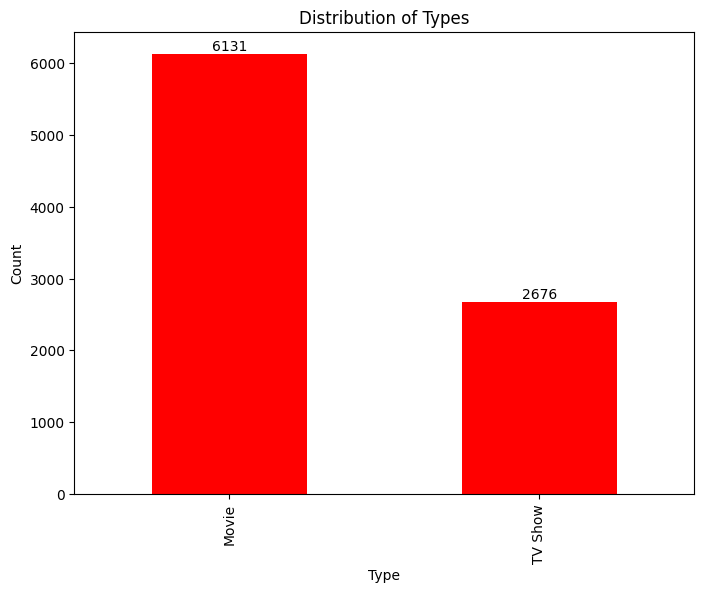

In [20]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your Netflix data
# Compute the value counts for the 'type' column
type_counts = df['type'].value_counts()

# Plot the graph
plt.figure(figsize=(8, 6))
ax = type_counts.plot(kind='bar',color='red')
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Types')
plt.show()


### Insights: The majority of the content in the dataset consists of movies, with a count of 6131, while TV shows make up a smaller portion, with a count of 2676.

# <h1 align="center">Director Analysis</h1>

In [25]:
# Group the DataFrame by 'director' and count the number of titles for each director
director_counts = df.groupby('director')['title'].count().sort_values(ascending=False)

# Print the top 10 most prolific directors
top_directors = director_counts.head(10)
print("Top 10 Most Prolific Directors:")
print(top_directors)


Top 10 Most Prolific Directors:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Name: title, dtype: int64


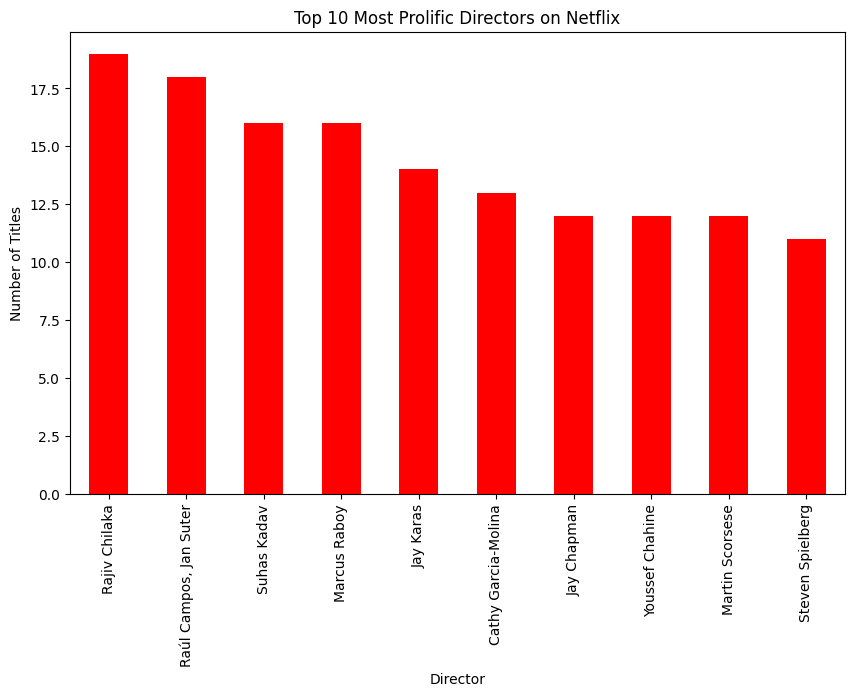

In [51]:
# Plot the graph
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar',color='red')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.title('Top 10 Most Prolific Directors on Netflix')
plt.show()


### Insights - The analysis highlights the top 10 most prolific directors on Netflix, with Rajiv Chilaka and Raúl Campos, Jan Suter having the highest number of titles, followed by Suhas Kadav, Marcus Raboy, and Jay Karas. These directors have made a significant contribution to the Netflix content library.

# <h1 align="center">Country Analysis</h1>

In [23]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

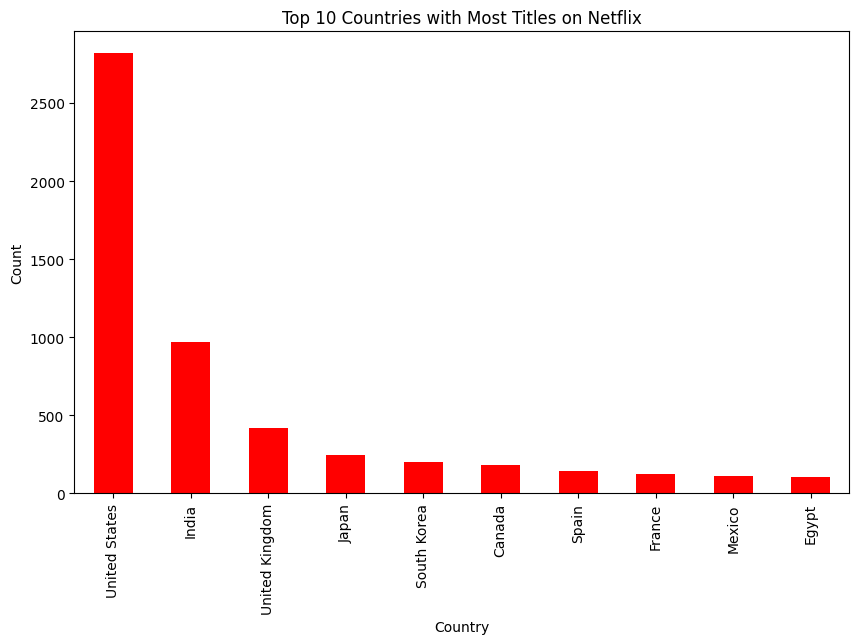

In [50]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your Netflix data

# Count the number of titles from each country
country_counts = df['country'].value_counts()

# Select the top 10 countries
top_countries = country_counts.head(10)

# Plot the graph
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar',color='red')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries with Most Titles on Netflix')
plt.show()


In [27]:
print(top_countries)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64


### Insights: The country analysis reveals that the United States has the highest number of titles on Netflix, followed by India, United Kingdom, Japan, and South Korea. These top countries contribute significantly to the content available on the platform.

# <h1 align="center">Release Year Analysis</h1>

In [29]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [32]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [33]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [37]:
rating_mapping = {
    'TV-MA': 18,
    'TV-14': 14,
    'TV-PG': 12,
    'R': 17,
    'PG-13': 13,
    'TV-Y7': 7,
    'TV-Y': 6,
    'PG': 10,
    'TV-G': 4,
    'NR': 18,  
    'G': 0,
    'TV-Y7-FV': 8,
    'NC-17': 18,
    'UR': 18,
}

df['rating_numeric'] = df['rating'].map(rating_mapping)


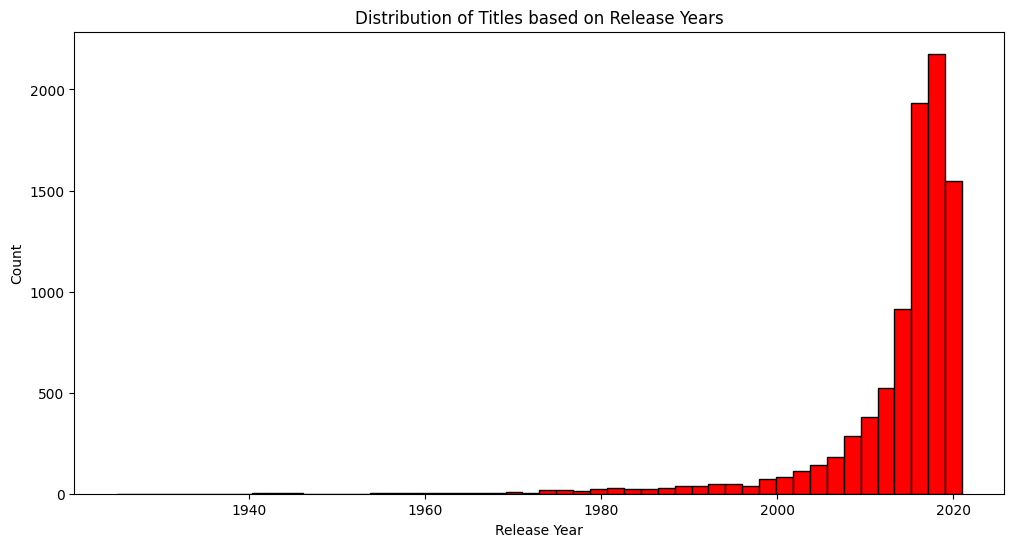

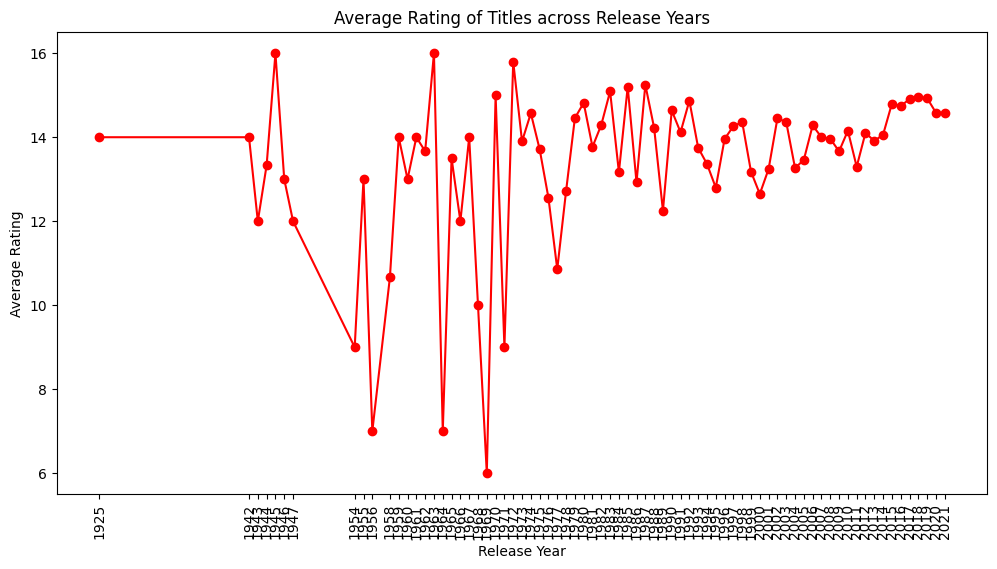

In [55]:
import matplotlib.pyplot as plt

# Plotting the distribution of titles based on release years
plt.figure(figsize=(12, 6))
plt.hist(df['release_year'], bins=50, edgecolor='black',color='red')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Titles based on Release Years')
plt.show()

# Comparing average ratings across different release years
average_ratings = df.groupby('release_year')['rating_numeric'].mean()

# Plotting the average ratings
plt.figure(figsize=(12, 6))
plt.plot(average_ratings.index, average_ratings.values, marker='o', color='red')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.title('Average Rating of Titles across Release Years')
plt.xticks(average_ratings.index, rotation=90)
plt.show()


In [44]:
top_years = df['release_year'].value_counts().head(10)

In [45]:
top_years

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: release_year, dtype: int64

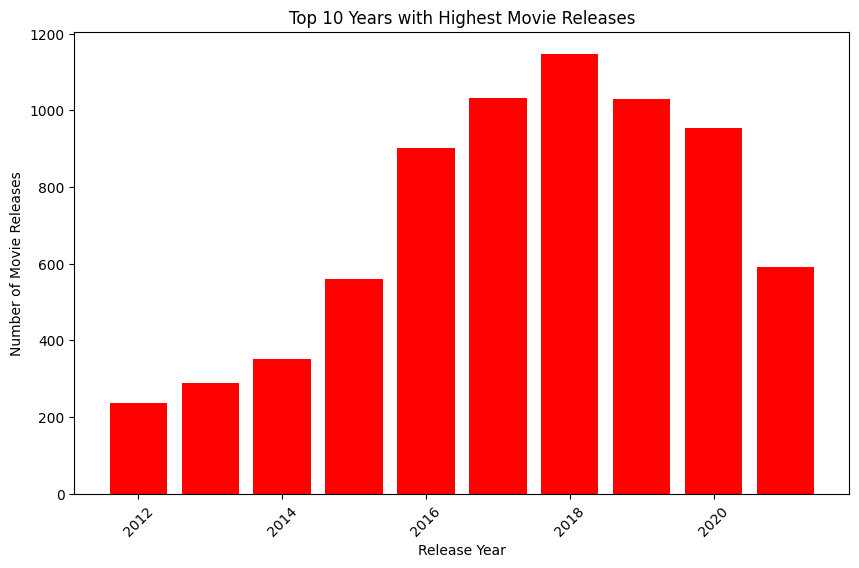

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(top_years.index, top_years.values, color='red')
plt.xlabel('Release Year')
plt.ylabel('Number of Movie Releases')
plt.title('Top 10 Years with Highest Movie Releases')
plt.xticks(rotation=45)
plt.show()


### Insights: 
- The year 2018 had the highest number of releases with 1147 titles.
- Following closely behind, 2017 and 2019 had 1032 and 1030 releases, respectively, making them the second and third highest release years.

# <h1 align="center">Rating Analysis</h1>

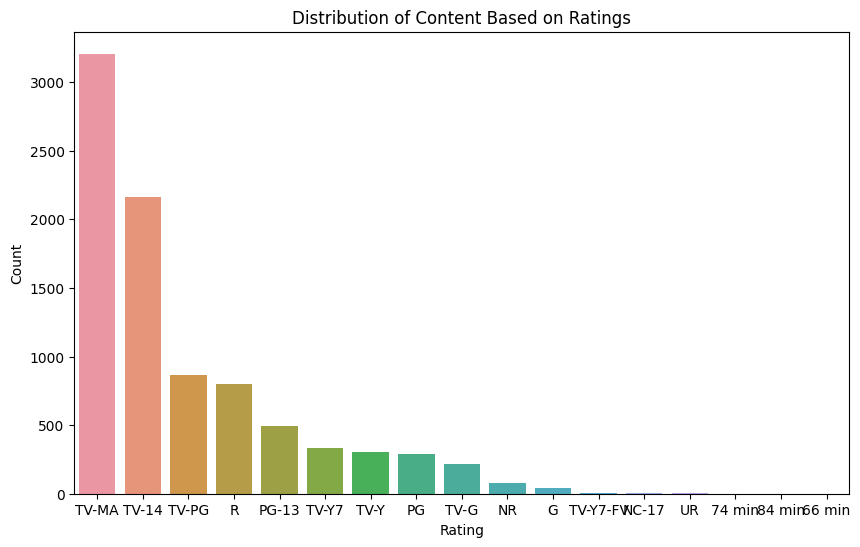

In [64]:
# Distribution of Content Based on Ratings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Content Based on Ratings
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Content Based on Ratings')
plt.show()


<Figure size 1200x800 with 0 Axes>

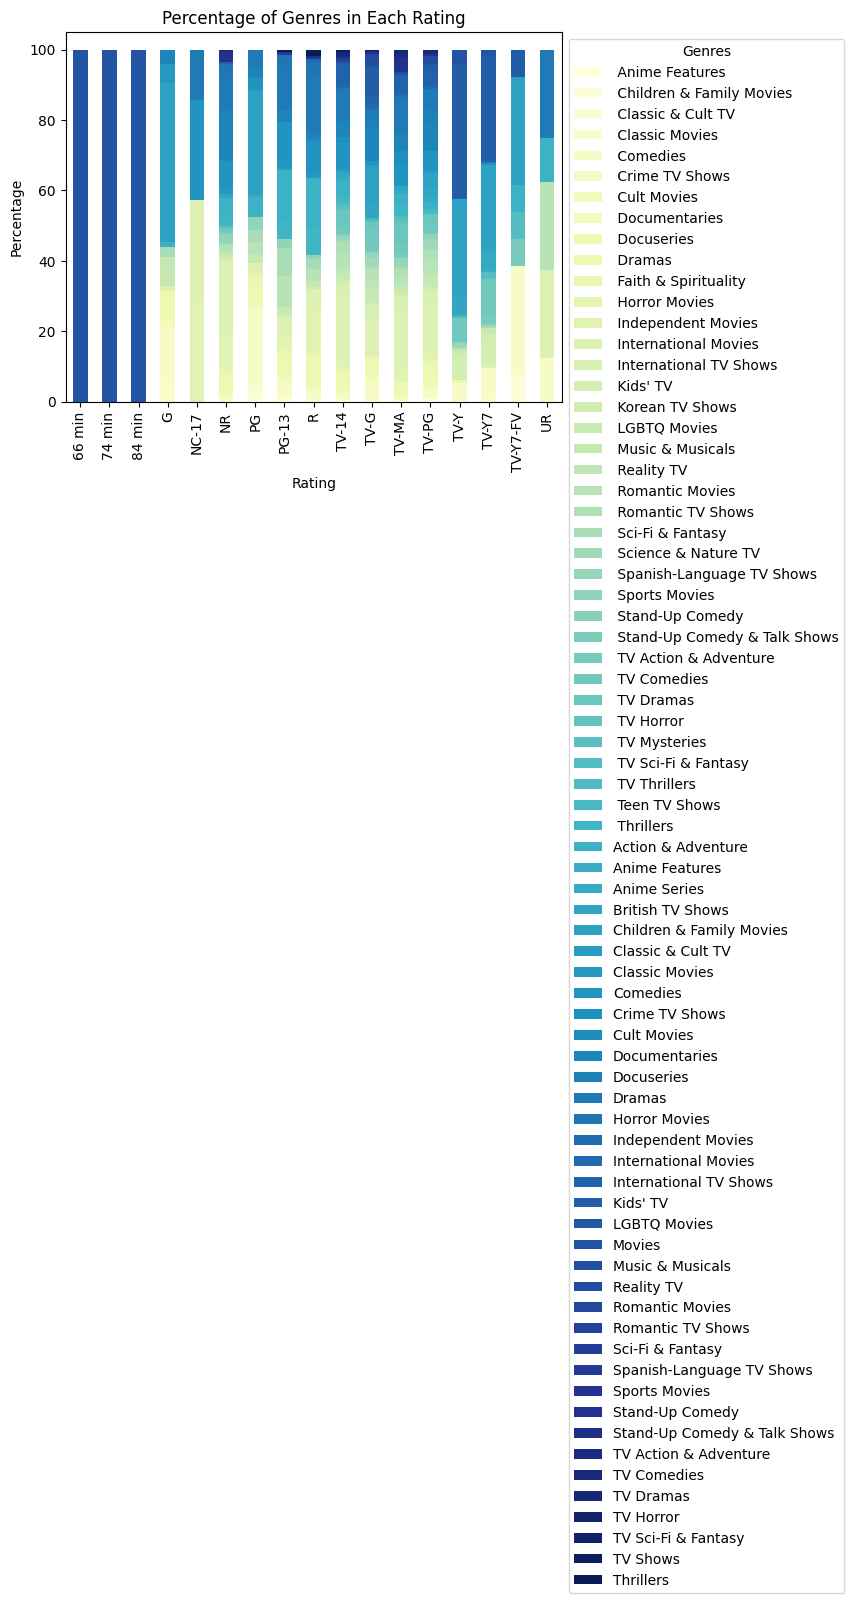

In [60]:
# Percentage of Genres in Each Rating
import seaborn as sns

# Relationship Between Ratings and Genres - Stacked Bar Chart
# Split the listed_in column to extract individual genres
df['genres'] = df['listed_in'].str.split(',')

# Create a pivot table with ratings as rows and genres as columns
rating_genre_pivot = df.explode('genres').pivot_table(index='rating', columns='genres', aggfunc='size', fill_value=0)

# Calculate the percentage of each genre within each rating
rating_genre_pivot_percent = rating_genre_pivot.div(rating_genre_pivot.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
rating_genre_pivot_percent.plot(kind='bar', stacked=True, cmap='YlGnBu')
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.title('Percentage of Genres in Each Rating')
plt.legend(title='Genres', bbox_to_anchor=(1, 1))
plt.show()


# Insights-
- TV-MA is the most common content rating, with 3207 titles falling under this category.
- TV-14 is the second most prevalent rating, with 2160 titles.
- R and PG-13 are the most common movie ratings, with 799 and 490 titles, respectively.

# <h1 align="center">Duration Analysis</h1>

In [ ]:
# Duration Analysis:

Calculate the average duration of movies and TV shows separately.
Explore the relationship between duration and rating or popularity.

In [35]:
import pandas as pd

# Calculate the average duration of movies and TV shows separately
movies_duration = df[df['type'] == 'Movie']['duration']
movies_duration = movies_duration.str.extract('(\d+)', expand=False)
movies_duration = movies_duration.astype(float).fillna(0).astype(int)  # Convert NaN to 0 and then to integer
movies_average_duration = movies_duration.mean()

tv_shows_duration = df[df['type'] == 'TV Show']['duration']
tv_shows_duration = tv_shows_duration.str.extract('(\d+)', expand=False)
tv_shows_duration = tv_shows_duration.astype(float).fillna(0).astype(int)  # Convert NaN to 0 and then to integer
tv_shows_average_duration = tv_shows_duration.mean()

print("Average duration of movies: {} minutes".format(movies_average_duration))
print("Average duration of TV shows: {} seasons".format(tv_shows_average_duration))

Average duration of movies: 99.52846191485891 minutes
Average duration of TV shows: 1.764947683109118 seasons


### Insights: The average duration of movies is approximately 99.53 minutes, while the average duration of TV shows is approximately 1.76 seasons.



# <h1 align="center">Genre Analysis</h1>

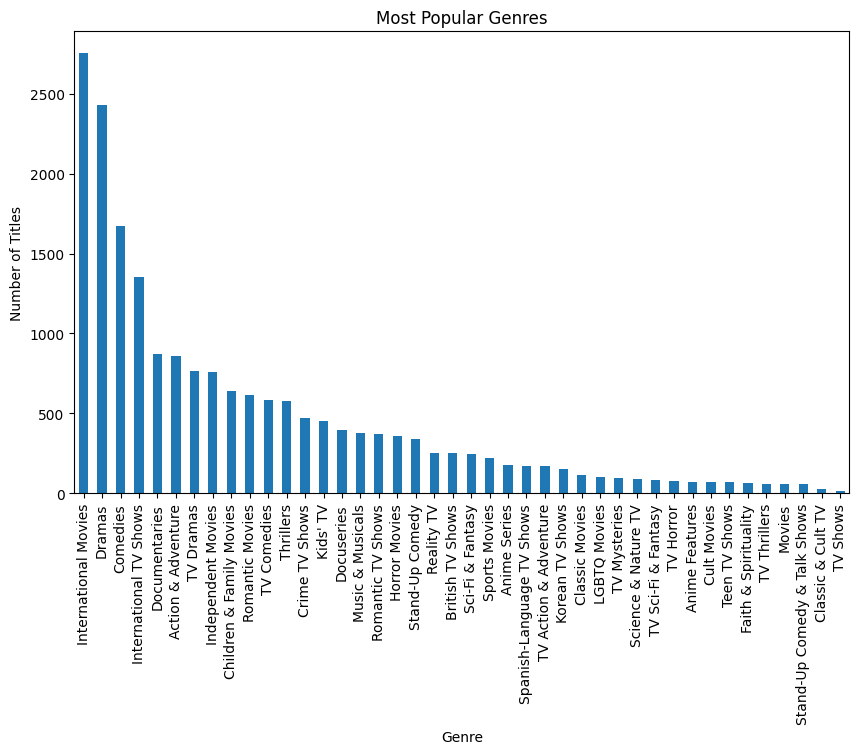

Distribution of ratings within different genres:
rating                                              66 min  74 min  84 min  \
listed_in                                                                    
Action & Adventure                                     0.0     0.0     0.0   
Action & Adventure, Anime Features                     0.0     0.0     0.0   
Action & Adventure, Anime Features, Children & ...     0.0     0.0     0.0   
Action & Adventure, Anime Features, Classic Movies     0.0     0.0     0.0   
Action & Adventure, Anime Features, Horror Movies      0.0     0.0     0.0   
...                                                    ...     ...     ...   
TV Horror, TV Mysteries, Teen TV Shows                 0.0     0.0     0.0   
TV Horror, Teen TV Shows                               0.0     0.0     0.0   
TV Sci-Fi & Fantasy, TV Thrillers                      0.0     0.0     0.0   
TV Shows                                               0.0     0.0     0.0   
Thrillers      

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of titles in each genre category
genre_counts = df['listed_in'].str.split(',').explode().str.strip().value_counts()

# Plotting the most popular genres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.title('Most Popular Genres')
plt.show()

# Analyze the distribution of ratings within different genres
ratings_by_genre = df.groupby('listed_in')['rating'].value_counts(normalize=True).unstack().fillna(0)

# Print the distribution of ratings within different genres
print("Distribution of ratings within different genres:")
print(ratings_by_genre)


In [60]:
print(genre_counts)

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C


# <h1 align="center">Text Analysis</h1>

In [50]:

import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['description'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [51]:
# Count the number of titles with positive sentiment scores
positive_count = len(df[df['sentiment_score'] > 0])

# Count the number of titles with negative sentiment scores
negative_count = len(df[df['sentiment_score'] < 0])

# Calculate the percentage of positive and negative titles
total_titles = len(df)
positive_percentage = (positive_count / total_titles) * 100
negative_percentage = (negative_count / total_titles) * 100

print("Percentage of positive titles: {:.2f}%".format(positive_percentage))
print("Percentage of negative titles: {:.2f}%".format(negative_percentage))


Percentage of positive titles: 46.78%
Percentage of negative titles: 43.61%


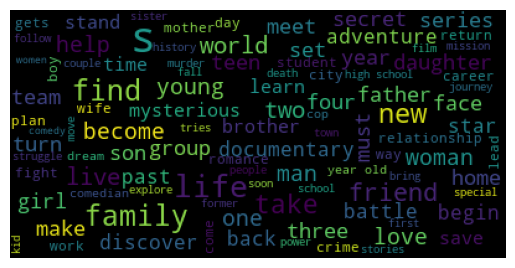

In [57]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Text Preprocessing
stop_words = set(stopwords.words('english'))
corpus = ' '.join(df['description'])
tokens = word_tokenize(corpus)
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words]
filtered_text = ' '.join(filtered_tokens)

# Generate Word Cloud
wc = WordCloud(background_color='black', max_words=100, max_font_size=35)
wc.generate(filtered_text)

# Plot Word Cloud
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()


# Conclusion:
- The majority of the content in the dataset consists of **movies (6131 titles)**, while **TV shows** make up a smaller portion **(2676 titles)**.
- The **top 10 most prolific directors** on Netflix are **Rajiv Chilaka, Raúl Campos, Jan Suter, Suhas Kadav, Marcus Raboy, and Jay Karas**, indicating their significant contribution to the Netflix content library.
- The **United States has the highest number of titles on Netflix**, followed by India, the United Kingdom, Japan, and South Korea, highlighting the top contributing countries to the platform's content.
- The **year 2018 had the highest number of releases (1147 titles)**, followed by 2017 (1032 titles) and 2019 (1030 titles), making them the top three highest release years.
- **TV-MA is the most common content rating**, followed by TV-14, R, and PG-13, indicating the prevalence of mature and adult-oriented content on Netflix.
- The **average duration of movies is approximately 99.53 minutes**, while the **average duration of TV shows is approximately 1.76 seasons**.
- Approximately **46.78%** of titles are classified as **positive based on sentiment analysis**, while **43.61% are classified as negative**.
- The **top five genres** on Netflix are **International Movies, Dramas, Comedies, International TV Shows, and Documentaries**.


# <h1 align="center">*****Thank you*****</h1>

<div style="text-align:center">
    <img src="https://t4.ftcdn.net/jpg/02/52/71/91/360_F_252719120_MjZEVKCxsrJkRw7SrqFKSFA2MMTOavdn.jpg" alt="Image" />
</div>